📊 Leaf Dataset Class Counts: {'Caterpillar and Semilooper Pest Attack': 0, 'Healthy_Soyabean': 204, 'Soyabean_Frog_Leaf_Eye': 169, 'Soyabean_Mosaic': 707, 'Soyabean_Rust': 852, 'Soyabean_Spectoria_Brown_Spot': 268}
📊 UAV Dataset Class Counts: {'Healthy_Soyabean': 280, 'Soyabean Semilooper and Caterpillar_Pest_Attack': 0}


C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_904\4279161736.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.keys(), rotation=25)
C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_904\4279161736.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.keys(), rotation=25)


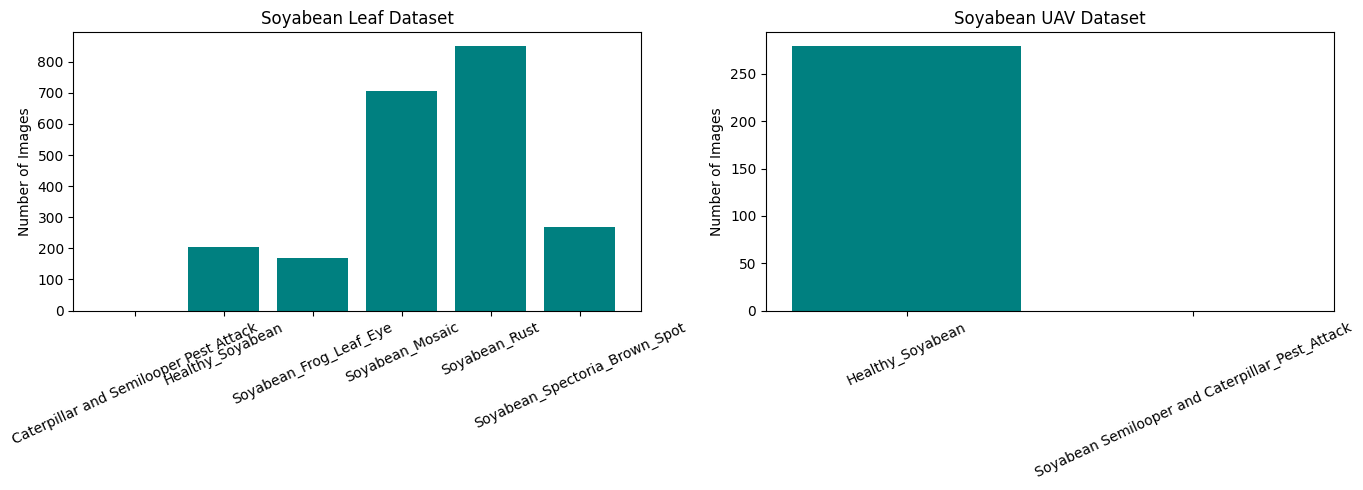

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ✅ Base dataset path
dataset_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision"

def get_class_counts(subset_name):
    subset_path = os.path.join(dataset_path, subset_name)
    class_counts = {}
    for cls in os.listdir(subset_path):
        cls_path = os.path.join(subset_path, cls)
        if os.path.isdir(cls_path):
            count = 0
            for r, d, files in os.walk(cls_path):
                count += len([f for f in files if f.lower().endswith(('.jpg','.png','.jpeg'))])
            class_counts[cls] = count
    return class_counts

# 🌿 Leaf dataset
leaf_dict = get_class_counts("Soyabean_Leaf_Image_Dataset")

# 🚁 UAV dataset
uav_dict = get_class_counts("Soyabean_UAV-Based_Image_Dataset")

print("📊 Leaf Dataset Class Counts:", leaf_dict)
print("📊 UAV Dataset Class Counts:", uav_dict)

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, counts, title in zip(
    axes,
    [leaf_dict, uav_dict],
    ["Soyabean Leaf Dataset", "Soyabean UAV Dataset"]
):
    ax.bar(counts.keys(), counts.values(), color="teal")
    ax.set_title(title)
    ax.set_ylabel("Number of Images")
    ax.set_xticklabels(counts.keys(), rotation=25)

plt.tight_layout()
plt.show()


In [2]:
from scipy.stats import skew

leaf_counts = list(leaf_dict.values())
uav_counts = list(uav_dict.values())

print("🌿 Leaf Dataset Skewness:", skew(leaf_counts))
print("🚁 UAV Dataset Skewness:", skew(uav_counts))


🌿 Leaf Dataset Skewness: 0.5330119703394248
🚁 UAV Dataset Skewness: 0.0


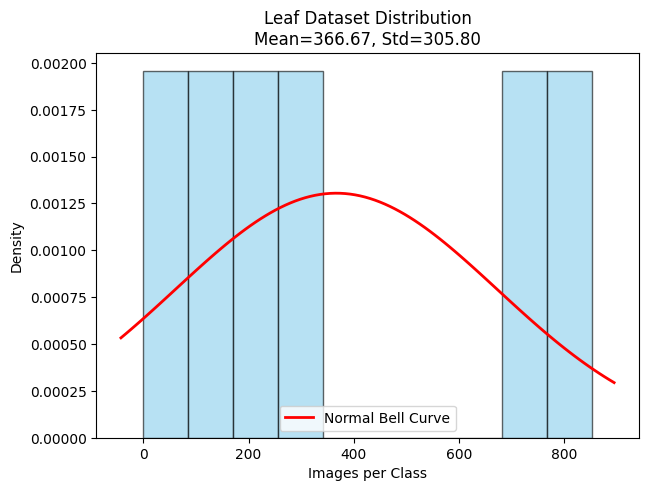

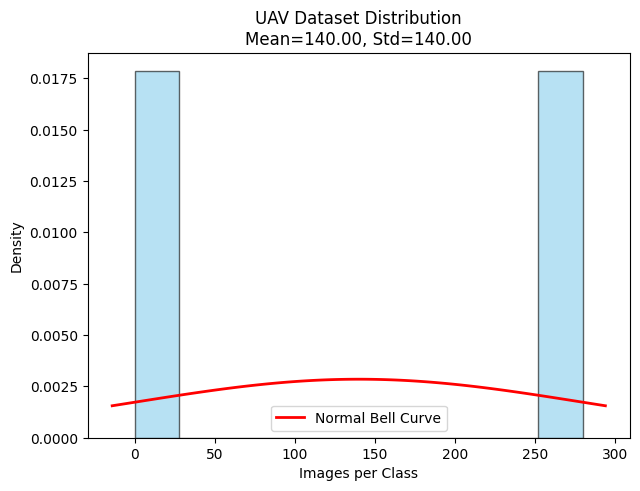

In [3]:
import numpy as np
from scipy.stats import norm

def plot_distribution(counts, title):
    counts = np.array(counts)
    mu, sigma = np.mean(counts), np.std(counts)

    plt.figure(figsize=(7,5))
    plt.hist(counts, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black")
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r', linewidth=2, label="Normal Bell Curve")
    plt.title(f"{title}\nMean={mu:.2f}, Std={sigma:.2f}")
    plt.xlabel("Images per Class")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

plot_distribution(leaf_counts, "Leaf Dataset Distribution")
plot_distribution(uav_counts, "UAV Dataset Distribution")
